<a href="https://colab.research.google.com/github/jcatanza/Data-Exercise/blob/master/Data_Science_Technical_Exercise_Joseph_Catanzarite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

The below is a short analytical assignment intended to give the candidate a chance to display some basic skills in exploratory data analysis and modeling, as well as the programming skills needed to leverage open source statistics packages. Complete as many of the tasks as possible. We leave it to the candidate to use their language of choice but use of Python or R is preferable. The candidate should either complete this Colaboratory notebook or return either a code file + image file or a notebook with their response to the tasks listed. If you prefer to use a different toolset to accomplish this exercise, feel free to grab the sample data [here](https://docs.google.com/spreadsheets/d/1WpKo7LqrQva9BZ20Z01gCH3u2UH0Q98ucoGXTemoV0w/edit?usp=sharing).


This exercise is intended to take no more than 3 hours.


#Installation
All of the below code will run on a Google hosted VM. You just have to authorize Colaboratory to work with your Google account. 

Install gspread to import google spreasheets.

In [0]:
!pip install --upgrade -q gspread

Running the below cell will generate a link to a new page with an auth code. Copy the auth code into the input box and hit enter.

In [0]:
from google.colab import auth
auth.authenticate_user()

Now we import the sample data and load it into a data frame.

In [0]:
import pandas as pd
import numpy as np
import gspread
from oauth2client.client import GoogleCredentials

In [0]:
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
book = gc.open_by_key('1WpKo7LqrQva9BZ20Z01gCH3u2UH0Q98ucoGXTemoV0w')

In [283]:
sheet = book.sheet1
data = sheet.get_all_records()
print(data)

[{'height': 23.02455092, 'weight': 30.86174141, 'gender': 'female'}, {'height': 24.03477018, 'weight': 28.13732721, 'gender': 'female'}, {'height': 22.75715329, 'weight': 20.22391018, 'gender': 'female'}, {'height': 14.68508944, 'weight': 18.99854692, 'gender': 'female'}, {'height': 30.00416522, 'weight': 27.73898948, 'gender': 'male'}, {'height': 29.56766508, 'weight': 36.83564684, 'gender': 'male'}, {'height': 31.11144415, 'weight': 39.07459084, 'gender': 'male'}, {'height': 22.19627914, 'weight': 34.3368778, 'gender': 'male'}, {'height': 24.87807186, 'weight': 18.42242032, 'gender': 'female'}, {'height': 29.63977016, 'weight': 22.43805862, 'gender': 'male'}, {'height': 23.47490557, 'weight': 21.21486504, 'gender': 'female'}, {'height': 24.36240069, 'weight': 27.78694599, 'gender': 'male'}, {'height': 6.049780633, 'weight': 11.95680253, 'gender': 'female'}, {'height': 24.30604454, 'weight': 23.3644721, 'gender': 'female'}, {'height': 33.13176901, 'weight': 35.91256918, 'gender': 'mal


# Exercise
# 1. Consume the data structure in memory with each of the fields as columns and each of the records as rows.

In [369]:
# import the data structure into a pandas DataFrame
df = pd.DataFrame(data=[ (x['height'], x['weight'], x['gender']) for x in data],columns=["height", "weight", "gender"])
df.head()

,height,weight,gender
0,23.024551,30.861741,female
1,24.034770,28.137327,female
2,22.757153,20.223910,female
3,14.685089,18.998547,female
4,30.004165,27.738989,male


## Examine the data.  
###      From the summary statistics, the data looks contrived -- as if the heights and weights were generated from the same distibution. We will have more to say about this conjecture in section 5 below.

In [370]:
# check data types and look for NaNs 
df.info()

# check the summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
height    1000 non-null float64
weight    1000 non-null float64
gender    1000 non-null object
dtypes: float64(2), object(1)
memory usage: 23.6+ KB


,height,weight
count,1000.000000,1000.000000
mean,26.110909,26.261035
std,8.398438,8.469613
min,0.709196,2.558565
25%,20.572758,20.411968
50%,26.199849,26.090346
75%,31.694449,32.287627
max,51.900623,49.825761


## Is the data consistent with our "domain knowledge" of dogs?

### Are the heights in inches? It is not impossible for large dogs to be as tall as 50 inches (~4 feet). Alternatively, could the heights be in cm? The maximum height is 50 cm, half a meter, about 18 inches, the height of a small dog. 50 cm doesn't make sense as the maximum height if the dogs in the sample are representative of the dog population as a whole.


### Are the weights in pounds? 50 pounds (the weight of a medium sized dog), does not seem right as the maximum weight for a representative dog population. On the other hand, a maximum weight of 50 kg (110 pounds) does make sense, because large dogs such as shepherds can weigh in the neighborhood of 100 pounds.

### Based on these considerations, we will adopt a working hypothesis that the dog heights are given in inches and the dog weights are given in kilograms.


## Identifying and removing discrepant points 
### In the combined training and test data, there are two extremely discrepant points, both female dogs with heights under an inch. That's not possible for dogs that are not in an embryonic state! We could remove these discrepant points.

In [371]:
df[df['height'] < 1]

,height,weight,gender
351,0.709196,6.789588,female
878,0.800628,6.126785,female


In [0]:
# remove discrepant points
# df=df[df.height>1]

# 2. Create a visualization to illustrate any potential relationship between weight and height.

### Using the training data, we display a scatter plot of height on the x-axis against weight on the y-axis. We add histograms of heights and weights in panels above and to the right of the scatter plot, respectively.

### Results: We observe that a dog's weight is strongly correlated with its height. But we also note that there is a lot of dispersion in the relationship; a given height can be associated with a large range of weights. Any predictive model would have high uncertainty. The histograms indicate that the distributions of heights and weights are likely to be Gaussian. 

### The code cell below implements a class PlotModel() that takes as input the data, and optionally a regression model. If no regression model is provided, a scatter plot of the weights versus heights of the training data is produced and histograms of heights and weights are attached at the top and right side of the scatter plot. If a regression model is provided, the model is fitted to the training data and the regression line is plotted in red. In this case, a scatter plot and histograms are produced for the test data, rather than the training data.



In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

# set random state for reproducibility
np.random.seed(19680801)
    
# get inputs for regression fit
def get_inputs(df,map_dict=None):
    
    # optionally apply map_dict to change gender column to 0. for female, 1. for male
    if(map_dict is not None):
        df = df.replace({'gender':map_dict})
        X = df[['height','gender']].values
    else:
        X = np.expand_dims(np.array(df['height']),axis=1)

    # split data into train and test predictors and targets
    X_train = X[:-200]
    X_test= X[-200:]
    y = np.expand_dims(np.array(df['weight']),axis=1)
    y_train = y[:-200]
    y_test = y[-200:]
   
    # return the data formatted for fitting
    return X_train,X_test,y_train,y_test


# run the model on the data set
def do_linear_regression(X_train,X_test,y_train,y_test):

    # Create linear regression object
    fit_intercept = True
    regr = linear_model.LinearRegression(fit_intercept = fit_intercept)

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

    # Explained variance score: 1 is perfect prediction
    print('R2 score: %.2f' % r2_score(y_test, y_pred))
    return(y_pred, regr)


# make plots
class PlotModel():

    def __init__(self, X_train, X_test, y_train, y_test, fit_func = None,make_plot=None):
        self.X_train, self.X_test, self.y_train, self.y_test, self.fit_func,self.make_plot = X_train, X_test, y_train, y_test, fit_func,make_plot

        # if we run the regression to predict the weights of the test set,
        #      then we want a scatterplot of X_test vs y_test;
        # otherwise we want a scatter plot of X_train vs y_train
        if(self.fit_func is not None):
            x, y = X_test,y_test
        else:
            x,y = X_train,y_train

        # data for the scatter plot
        self.x, self.y = x, y
        
    # make the scatter plots, histograms, 
    #     and optionally run the linear regression 
    #          and plot the true weights of the test set agains the predicted regression trend
    def make_plots(self):

        # for plot
        x,y = self.x, self.y


        if(self.make_plot):
            # axes definitions
            left, width = 0.1, 0.65
            bottom, height = 0.1, 0.65
            spacing = 0.005
            rect_scatter = [left, bottom, width, height]
            rect_plot = [left, bottom, width, height]
            rect_histx = [left, bottom + height + spacing, width, 0.2]
            rect_histy = [left + width + spacing, bottom, 0.2, height]

            # rectangular figure
            plt.figure(figsize=(8, 8),edgecolor='w',facecolor='w')
            plt.xlabel('height, inches')
            plt.ylabel('weight, kilograms')
            ax_scatter = plt.axes(rect_scatter)
            ax_scatter.tick_params(direction='in', top=True, right=True)
            ax_plot = plt.axes(rect_plot)
            ax_plot.tick_params(direction='in', top=True, right=True)
 
            ax_histx = plt.axes(rect_histx)
            ax_histx.tick_params(direction='in', labelbottom=False)
            ax_histy = plt.axes(rect_histy)
            ax_histy.tick_params(direction='in', labelleft=False)

        # optionally run the linear regression model and show the predicted regression line
        if(self.fit_func is not None):
 
            # do the regression
            y_pred,regr = self.fit_func(self.X_train,self.X_test,self.y_train,self.y_test)

            #plot the regression line
            if(self.make_plot):
                ax_plot.plot(self.X_test, y_pred, color='red', linewidth=2,label='predicted weight')
                ax_plot.legend(loc = 'upper left')

        if(self.make_plot):
            # determine binwidths for histograms
            n_bins = 25
            x_binwidth = (np.max(x)-np.min(x))/n_bins
            y_binwidth = (np.max(y)-np.min(y))/n_bins
        
            # determine limits for scatter plot
            x_lim = np.ceil(np.max(x) / x_binwidth) * x_binwidth
            y_lim = np.ceil(np.max(y) / y_binwidth) * y_binwidth
     
            # display scatter plot of the data
            ax_scatter.scatter(x, y)
            ax_scatter.set_xlim((-0.1*x_lim, 1.1*x_lim))
            ax_scatter.set_ylim((-0.1*y_lim, 1.1*y_lim))
            ax_scatter.grid()

            # add x and y histograms
            x_bins = np.arange(0, x_lim + x_binwidth, x_binwidth)
            y_bins = np.arange(0, y_lim + y_binwidth, y_binwidth)
            ax_histx.hist(x, bins=x_bins)
            ax_histx.set_xlim(ax_scatter.get_xlim())
            ax_histx.yaxis.set_label_position("right")
            ax_histx.yaxis.set_label_text("counts")
            ax_histy.hist(y, bins=y_bins, orientation='horizontal')
            ax_histy.set_ylim(ax_scatter.get_ylim())
            ax_histy.xaxis.set_label_position("top")
            ax_histy.xaxis.set_label_text("counts")
 
            # display the plots
            plt.show()

        # return the regression model
        if(self.fit_func is not None):
            return y_pred,regr



(1000,) (1000,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:96: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


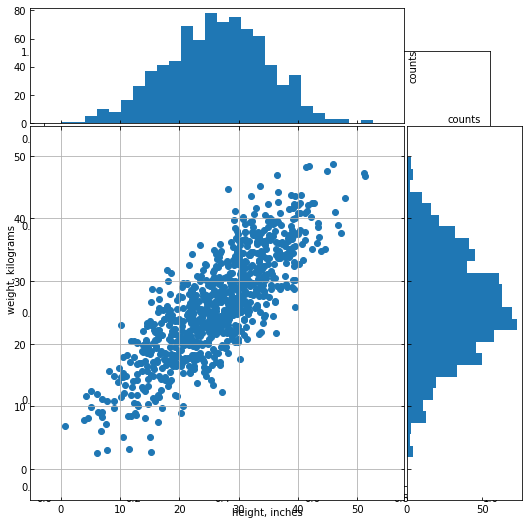

In [405]:
# training data scatter plot and histograms
X_train,X_test,y_train,y_test = get_inputs(df)

X = df['height'].values
y = df['weight'].values

print(X.shape,y.shape)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

plotter = PlotModel(X_train, X_test, y_train, y_test,fit_func=None,make_plot=True)
plotter.make_plots()

# 3. Use linear regression to try to predict weight in terms of just height. 

### Perform any analyses necessary to determine the applicability and effectiveness of the model.  Imagine our business depends on accurately predicting the weight of dogs from height – what checks would you want to perform before you would be comfortable using the model in the real world? Please explain your analyses and findings.

### The results of the linear model for weight vs height are displayed below. The regression model supports a strong linear relationship between weights and heights of dogs. The $R^{2}$ score tells us that the model explains $64$% of the variance in the data. However, the data is characterized by high dispersion: the root-mean-squared error is about $5$ kilograms, meaning that any dog's predicted weight is likely to be off by about +/- $5$ kilograms. If your business depends on accurate weight predictions (for example, predicting how much food, or water, or medicine each dog needs per day) this model will not be satisfactory. On the other hand, if your goal is to classify dogs as large, medium, or small, you may be able to tolerate prediction errors of $5$ kilograms, so the model can be useful.




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:96: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Mean squared error: 25.16
R2 score: 0.64


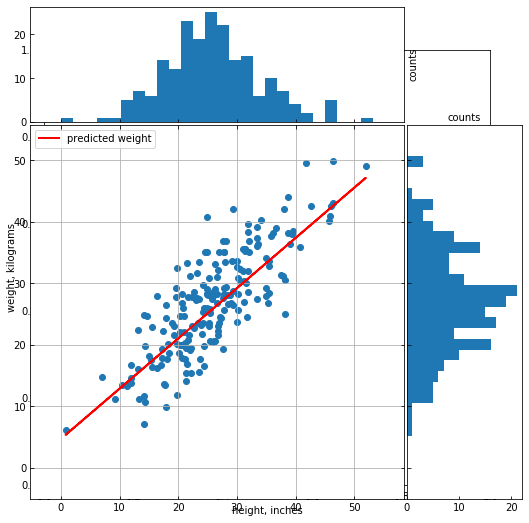

Regression coefficients for all dogs in training set: slope = 0.817 , intercept = 4.729


In [389]:
# test data scatter plot and histograms, against the fitted predictions
plotter = PlotModel(X_train, X_test, y_train, y_test,fit_func=do_linear_regression,make_plot=True)
y_pred,regr = plotter.make_plots()

# model coefficients
print('Regression coefficients for all dogs in training set: slope = {:.3f} , intercept = {:.3f}'.format(regr.coef_[0][0], regr.intercept_[0]))

# 4. Check whether the relationship between height and weight is different for different genders

### We fit separate linear regression models to the male and female components of the dog training sample. Comparing parameters from the respective fits allows us to determine whether the relationships are different.

### We find that the slopes and the intercepts of the male and female dog weight vs. height models for the training data are different. The intercepts for female and male dogs are 4.4 kilograms and 5.3 kilograms, and the slopes are 0.79 kilograms/inch and 0.83 kilograms/inch. The lower slope for female dogs is partly due to the discrepant point with 0.7 inch height at the left of the scatter plot. But the 0.9 kilogram difference in the intercepts is significant: it means that at any given height, a male dog outweighs a female dog by about a kilogram, likely because of greater muscle mass. We conclude that the relationship between height and weight is different for male and female dogs.

### The $R^2$ scores for the female and male dogs are $0.41$ and $0.47$ respectively, significantly poorer than the $R^2$ score for the model fitted to the all-gender data set.

### Note also that the weight histograms for female and male dogs resemble Gaussians truncated on the right and left, respectively, which offers a clue to how the data was simulated. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:96: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Mean squared error: 26.07
R2 score: 0.41


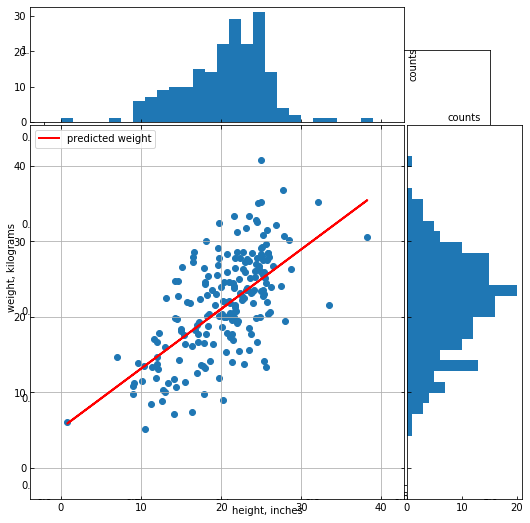

Regression coefficients for female dogs in the training set: slope = 0.790 , intercept = 5.252

Mean squared error: 24.61
R2 score: 0.47


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:96: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


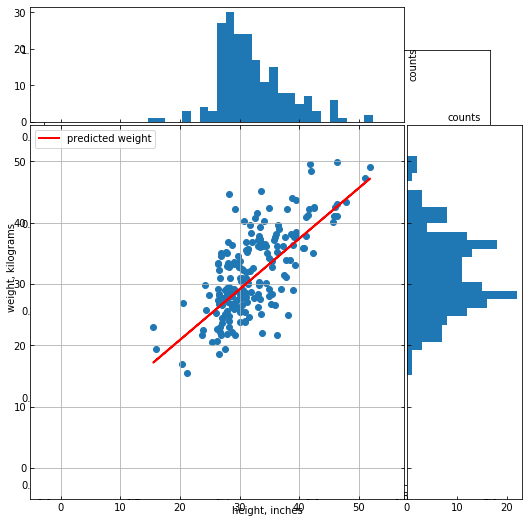

Regression coefficients for male dogs in the training set: slope = 0.824 , intercept = 4.400



In [390]:
# 4. Check whether the relationship between height and weight is different for different genders
female_data = df[df['gender'] ==  'female']
male_data = df[df['gender'] ==  'male']

# female dogs
X_train,X_test,y_train,y_test = get_inputs(female_data)
plotter = PlotModel(X_train, X_test, y_train, y_test,fit_func=do_linear_regression,make_plot=True)
y_pred, regr = plotter.make_plots()

# model coefficients for males
print('Regression coefficients for female dogs in the training set: slope = {:.3f} , intercept = {:.3f}\n'.format(regr.coef_[0][0], regr.intercept_[0]))

# male dogs
X_train,X_test,y_train,y_test = get_inputs(male_data)
plotter = PlotModel(X_train, X_test, y_train, y_test,fit_func=do_linear_regression,make_plot=True)
y_pred, regr = plotter.make_plots()

# model coefficients for males
print('Regression coefficients for male dogs in the training set: slope = {:.3f} , intercept = {:.3f}\n'.format(regr.coef_[0][0], regr.intercept_[0]))

# 5. Undertake a suitable test to check whether the average weight of males is different from females.





### To determine whether the means are different, we can compare their difference normalized by standard deviation. Compute the means and standard deviations of the male and female dog samples. If the means are separated by more than a standard deviation, we can say the means are different. 


### In our case, the means are about 31 kilograms and 21 kilograms for males and females respectively, and the standard deviations are about 7 kilograms. The difference between the means is about 10 kilograms, which is about 1.5 standard deviations, so we conclude the means are significantly different.

In [391]:
female_mean = female_data['weight'].mean()
female_std = female_data['weight'].std()
male_mean = male_data['weight'].mean()
male_std = male_data['weight'].std()
print('Mean and std weights: female dogs {:.2f} and {:.2f}, male dogs {:.2f} and {:.2f}'.format(female_mean,female_std,male_mean,male_std))

Mean and std weights: female dogs 21.38 and 6.87, male dogs 31.51 and 6.70


### A related question we can address is: **Are the male and female dog weights drawn from the same distribution?** Although an affirmative conclusion is indicated by visual inspection of the weight histograms for the male and female dog samples, we seek a quantitative answer. 

### The **two-sample Kolmogorov-Smirnov test** (ks-test) is applicable to this question. We first compute the ks-test statistic $D$ and its $p$-value from the two cumulative distributions. Then we compare $D$ with $D_{critical}$ and its associated $p$-value. If $D$ exceeds $D_{critical}$, we can reject the null hypothesis that the distributions are the same, at a significance level corresponding to the associated $p$-value.

### Application of the ks-test (below) shows that weight distributions of the male and female dogs in the sample are strongly different, because the $D$ statistic of $0.55$ far exceeds $D_{critical}$ at all of the $p$-values we considered. 

### The k-s test also computes a vaninshingly small $p$-value of $2e-15$ corresponding to the null hypothesis. This again tells us that we can confidently reject the null hypothesis that the distributions are the same. 

In [392]:
# compute critical values of the two-sample kolmogorov-smirnov test statistic D
#     for a range of p-values α
#     Reference: sparky.rice.edu/astr360/kstest.pdf

# α    0.10 0.05 0.025 0.01 0.005 0.001
# c(α) 1.22 1.36  1.48 1.63  1.73  1.95

# critical values of D given a p-value alpha are
# D(α) = c(α) * sqrt((n1 + n2)/(n1*n2))

# In our case, for the training sample 
#      n1 = n_male = 482
#      n2 = n_female = 518
n1, n2 = len(male_data), len(female_data)
print('n_male = ',n1, 'n_female = ',n2)

# function to compute a range of critical D statistic values corresponding to a range of alphas (p-values) 
def compute_critical_D_statistic_values(n1,n2):

    # make dictionary {alpha:c_alpha} of alpha values and their corresponding c_alphas
    alphas = [0.10, 0.05, 0.025, 0.01, 0.005, 0.001]
    c_alphas = [1.22, 1.36,  1.48, 1.63,  1.73,  1.95]
    c_alpha =  dict()
    for idx, alpha in enumerate(alphas):
        c_alpha[alpha] = c_alphas[idx]

    # compute critical D statistic values
    D_alpha = lambda alpha: c_alpha[alpha]*np.sqrt((n1+n2)/(n1*n2))
    D_values = [D_alpha(alpha) for alpha in alphas]
    # return a dictionary of {alpha:D_critical}
    return dict(zip(alphas,D_values))

# dictionary of p-values and corresponding critical D-statistic values
D_critical = compute_critical_D_statistic_values(n1,n2)
print("p-values and their critical D-statistics:")
for item in D_critical.items():
    print("{:6.2} {:6.2}".format(item[0],item[1]))

# apply the k-s test to compare the distributions of the male and female samples
from scipy.stats import ks_2samp
ks_2samp(male_data['weight'], female_data['weight'])


n_male =  482 n_female =  518
p-values and their critical D-statistics:
   0.1  0.077
  0.05  0.086
 0.025  0.094
  0.01    0.1
 0.005   0.11
 0.001   0.12


Ks_2sampResult(statistic=0.5523718739486374, pvalue=1.7763568394002505e-15)

### Interestingly, we can also use the k-s test to compare the distributions of heights and weights from the training set, to ask if **they** are drawn from the same distribution, as conjectured in part 1.

### The k-s test yields a $D$ statistic of $0.029$ and a $p$-value of $0.8$. Since the $D$ statistic is lower than the critical $D$ values associated with all the $p$-values we tried, we cannot rule out null hypothesis with any level of confidence! Also, the huge $p$-value of $0.8$ associated with the $D$ statistic itself is another another indication that we cannot reject the null hypothesis. The k-s test provides evidence in support of our conjecture that dog weights and heights were drawn from the same distribution.

In [393]:
ks_2samp(df['weight'], df['height'])

Ks_2sampResult(statistic=0.029, pvalue=0.7946637387576738)

# 6. Use a suitable method to add gender as a predictor variable and include the following: 
##    a. Re-assess the quality of prediction with a suitable measure 

### We will run a multivariable linear regression model that includes both gender and height as predictors. We need only map female and male genders to numerical values of 0. and 1., and include the gender values in the training data. The multilinear regression model is

### $weight = A_1 \times height + A_2 \times gender + A_3$

### Our model fit gives $A_1 = 0.801, A_2 = 0.354$, and $A_3 = 4.955$

### The predictions are no better than before, with a root-mean-squared error of $5$ kg. 
##    b. State which of the predictor variables are significant predictors of weight

### The values of $A_1$ and $A_2$ indicate that both predictors are significant, but weight is more sensitive to height than to gender.  



In [394]:
# we will run a linear regression model that includes both gender and height as predictors
map_dict = {'female':0.,'male':1.}

# we need only map female and male genders to numerical values of 0. and 1., and include the gender values in the training data
X_train,X_test,y_train,y_test = get_inputs(df,map_dict=map_dict)

# test data against the fitted predictions
plotter = PlotModel(X_train, X_test, y_train, y_test,fit_func=do_linear_regression,make_plot=False)
y_pred,regr = plotter.make_plots()

# model coefficients
print('Regression coefficients for all dogs in training set: coef1 = {:.3f}, coef2 = {:.3f}, intercept = {:.3f}'.format(regr.coef_[0][0],regr.coef_[0][1], regr.intercept_[0]))

Mean squared error: 25.17
R2 score: 0.64
Regression coefficients for all dogs in training set: coef1 = 0.801, coef2 = 0.354, intercept = 4.955
